# Two Candles, One Cake

### Problem Statement

Suppose that you have a [Battenburg cake](https://en.wikipedia.org/wiki/Battenberg_cake), which is 1 unit long.

You then:
- place two candles at random positions along the length
- randomly cut the cake across the length

*What is the probability that the knife cuts between the two candles?*

<div>
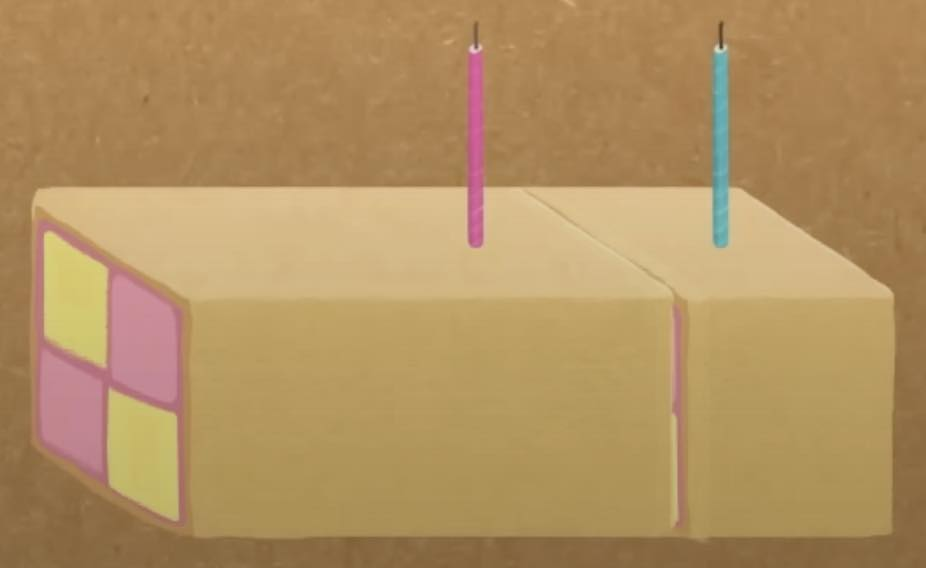
</div>


### Problem History

I originally saw this problem presented by Ben Sparks on Numberphile https://www.youtube.com/watch?v=FkVe8qrT0LA. 

This problems seems to have been around before hand though as I found it on New Scientist https://www.newscientist.com/article/mg24232361-100-puzzle-09-the-cake-and-the-candles/

# Solution

## Refining the Problem Statement

Let:
- $C_1$, $C_2 \sim U(0,1)$ be the candle positions
- $K \sim U(0,1)$ be the knife position

Let the probability that the knife cuts between the two cuts be $P(C_{1,2} < K < C_{1,2})$ such that

$P(C_{1,2} < K < C_{1,2}) = P(C_1 < K < C_2) + P(C_2 < K < C_1)$.

Since these variables are uniform random we know that the two terms on the right hand side must be equal i.e.

$P(C_1 < K < C_2) = P(C_2 < K < C_1)$.

Therefore we only need to derive an equation for one of the terms and we can rewrite the first probability as

$P(C_{1,2} < K < C_{1,2}) = 2 \cdot P(C_1 < K < C_2)$.


## Joint Cumulative Probability - Part 1

We can further decompose as $P(C_1 < K < C_2)$ as follows:

$P(C_1 < K < C_2) = P(C_1 - K < 0\ \mathrm{and}\ C_2 - K > 0).$

Letting $X=C_1 - K$ and $Y=C_2 - K$ then

$P(C_1 < K < C_2) = P(X < 0\ \mathrm{and}\ Y > 0)$.

For convenience we can align both inequalities by letting $Y = K - C_2$ then

$P(C_1 < K < C_2) = P(X < 0\ \mathrm{and}\ Y < 0)$.

Therefore the solution to the problem is given by the joint cumulative probability

$$P(X < 0\ \mathrm{and}\ Y < 0) = \int_{-1}^0 \int_{\alpha(y)}^{\beta(y)} f_{X,Y}(x,y) \, dx \, dy.$$

where $f_{X,Y}(x,y)$ is the joint density of $X$ and $Y$ and $\alpha$, $\beta$ are bounds to be defined in the next section.


## Joint Density

The joint density can be decomposed into

$$
\begin{align}
f_{X,Y}(x,y) &= f_{Y\mid X}(y\mid x)f_X(x) \\
&= f_{X\mid Y}(x\mid y)f_Y(y)
\end{align}
$$

### Marginals

The marginals $f_X(x)$ and $f_Y(y)$ are given by the PDFs from distributions for $X$ and $Y$.

Since $X$ and $Y$ are the difference of two standard uniform random variables they follow a Triangular distribution e.g.

$C_1 - K = X \sim \text{Triangular}(-1, 0, 1)$.

### Conditional Probability

The conditional probability density $f_{X\mid Y}(x\mid y)$ can be established through the shared variable $K$ in both $X$ and $Y$.

If we observe a specific value $y$ for $Y$, and since $Y = K - C_2$  we can narrow the support of $K$ to

$K \in [\max(y, 0), \min(1, 1+y)]$,

therefore $K \sim U(\max(y, 0), \min(1, 1+y))$.

Since information about $Y$ does not influence $C_1$ it still follows a standard uniform distribution.

Therefore $X$ is the difference of two uniform variables with different supports and is trapezoidal distributed. Trapezoidal distributions have four parameters: $a$, $b$, $c$, $d$; that correspond to the lower bound, first bend, second bend and upper bound respectively.

Let $F \sim U(l,m)$ and $G \sim U(n, o)$ and $H = F-G$ then

$$H\sim \text{Trapezoidal}(l-o,l-n,m-o,m-n)$$

Therefore for a known value of $Y$ the distribution of $X$ is

$$X_{Y = y} \sim \text{Trapezoidal}(-\min(1, 1+y), -\max(y, 0), 1-\min(1, 1+y), 1-\max(y, 0))$$

and the conditional probability density $f_{X\mid Y}$ can be drawn from this distribution.

## Joint Cumulative Probability - Part 2

Given the support of $X_{Y = y}$ the joint cumulative probability is 

$$ P(X < 0\ \mathrm{and}\ Y < 0) = P(X < 0, Y < 0) = \int_{-1}^0 \int_{a}^{\min(d,0)} \left(\begin{cases} y + 1 & \text{for}\: y < 0 \\1 - y & \text{otherwise} \end{cases}\right) \left(\begin{cases} \frac{x + \min\left(1, y + 1\right)}{- \max\left(0, y\right) + \min\left(1, y + 1\right)} & \text{for}\: x < - \max\left(0, y\right) \\\frac{- x - \max\left(0, y\right) + 1}{- \max\left(0, y\right) + \min\left(1, y + 1\right)} & \text{for}\: x > 1 - \min\left(1, y + 1\right) \\1 & \text{otherwise} \end{cases}\right) \, dx \, dy$$

## Solution

Evaluating the integral yields

$$P(C_1 < K < C_2)=\frac{1}{6}$$

therefore

$$P(C_{1,2 } < K < C_{1,2}) = 2 \cdot P(C_1 < K < C_2) = 2 \cdot \frac{1}{6} = \frac{1}{3}$$

# Sympy Verification

I used sympy to evaluate the integral.

In [1]:
from sympy import symbols, integrate, Piecewise, Max, Min, simplify, Integral

y = symbols("y")
triangular = Piecewise(
    (y + 1, y < 0),
    (-y + 1, True)
)

x = symbols("x")
k0 = Max(y, 0)
k1 = Min(1, 1+y)

a = -k1
b = -k0
c = 1 - k1
d = 1 - k0

trapezoid = Piecewise(
    ((x-a)/(b-a), x < b),
    ((d-x)/(d-c), x > c),
    (1, True)
)

In [2]:
triangular*trapezoid

Piecewise((y + 1, y < 0), (1 - y, True))*Piecewise(((x + Min(1, y + 1))/(-Max(0, y) + Min(1, y + 1)), x < -Max(0, y)), ((-x - Max(0, y) + 1)/(-Max(0, y) + Min(1, y + 1)), x > 1 - Min(1, y + 1)), (1, True))

In [3]:
2 * integrate(triangular*trapezoid, (x, a, Min(d, 0)), (y, -1, 0) )

1/3

# Numeric Integration Verification

In [4]:
import numpy as np
from scipy.integrate import dblquad
from scipy.stats import trapezoid, triang
import time

# Used for tighter inner integral bounds
def x_lower(y):
    # Support of K
    k_range = [np.maximum(y, 0), np.minimum(1, 1+y)]

    # Support of C1
    c1_range = [0, 1]

    # Conventional trapezoid parameters
    a = c1_range[0] - k_range[1]
    
    return a

def x_upper(y):
    # Support of K
    k_range = [np.maximum(y, 0), np.minimum(1, 1+y)]

    # Support of C1
    c1_range = [0, 1]

    # Conventional trapezoid parameters
    d = c1_range[1] - k_range[0]
    
    return np.minimum(d, 0)

def f(y, x):
    # Y marginal
    y_density = triang.pdf(y, loc=-1, scale=2, c=0.5)

    # Support of K
    k_range = [np.maximum(y, 0), np.minimum(1, 1+y)]

    # Support of C1
    c1_range = [0, 1]

    # Conventional trapezoid parameters
    a = c1_range[0] - k_range[1]
    b = c1_range[0] - k_range[0]
    c = c1_range[1] - k_range[1]
    d = c1_range[1] - k_range[0]

    # Scipy trapezoid parameters
    loc = a
    scale = d-a
    c1 = (b-a) / scale
    d1 = (c-a) / scale

    # X conditional probability density
    x_density = trapezoid.pdf(x,c=c1, d=d1,loc=loc, scale=scale)

    return y_density*x_density

p = dblquad(f, a=-1, b=0, gfun=x_lower, hfun=x_upper)[0]
print(f"Probability: {p*2}")

Probability: 0.3333333333333333


#  Simulation Verification

For a sanity check I simulated the problem.

In [5]:
from scipy.stats import uniform
import numpy as np

n_rvs = 1000000
rvs_c1 = uniform.rvs(size=n_rvs)
rvs_c2 = uniform.rvs(size=n_rvs)
rvs_ck = uniform.rvs(size=n_rvs)

way1 = (rvs_c1 < rvs_ck) & (rvs_c2 > rvs_ck)
way2 = (rvs_c1 > rvs_ck) & (rvs_c2 < rvs_ck)

total = way1 | way2
np.sum(total)/n_rvs

0.333238

# Visualisation

This visualisation is a replication of a visualisation from the Numperphile video.

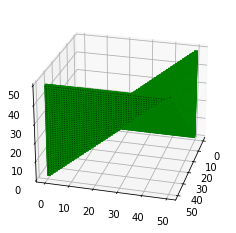

In [6]:
import matplotlib.pyplot as plt
import numpy as np

resolution=50
dims = 3
x1_ind, x2_ind, x3_ind = np.indices([resolution for i in range(dims)])

x1_ind = np.ravel(x1_ind)
x2_ind = np.ravel(x2_ind)
x3_ind = np.ravel(x3_ind)

truth_array = np.zeros(len(x1_ind))

res_vals = np.linspace(0,1, resolution, endpoint=True)

cube_lin = ((res_vals[x1_ind] > res_vals[x3_ind]) & (res_vals[x2_ind] < res_vals[x3_ind])) | ((res_vals[x1_ind] < res_vals[x3_ind]) & (res_vals[x2_ind] > res_vals[x3_ind]))

cube =  cube_lin.reshape(resolution, resolution, resolution)

colors = np.empty(cube.shape, dtype=object)
colors[cube] = 'green'

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(cube, facecolors=colors, edgecolor='green')

ax.view_init(25, 15)

plt.draw()
plt.show()